# EPS FALL 2024 CA3
### name: Ali Chegini
### SID:801801064

### Q3: centeral limit theorom and its application with a focus on binomial and bernoulli distribution

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


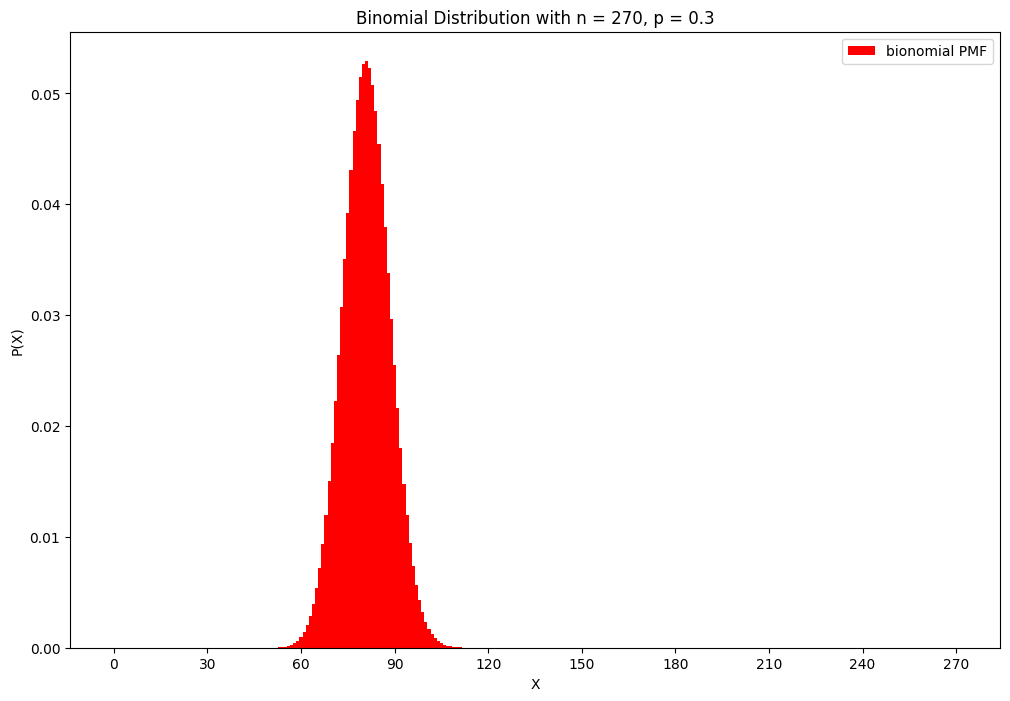

In [2]:
n = 270 #number of trials
p = 0.3 #probablity of success in every trial
k_values = np.arange(0, n + 1) #all possible outcomes for binomial 

binom_pmf = stats.binom.pmf(k_values, n, p)
fig, ax = plt.subplots(figsize = (12, 8))
ax.set_title(f"Binomial Distribution with n = {n}, p = {p}")
ax.bar(k_values, binom_pmf, label = "bionomial PMF", color = "red", width = 1)
ax.set_xlabel("X")
ax.set_ylabel("P(X)")
ax.legend()
#ax.set_xlim(0,270)
plt.xticks(np.arange(0, n + 1, 30))


plt.show()


-10
25


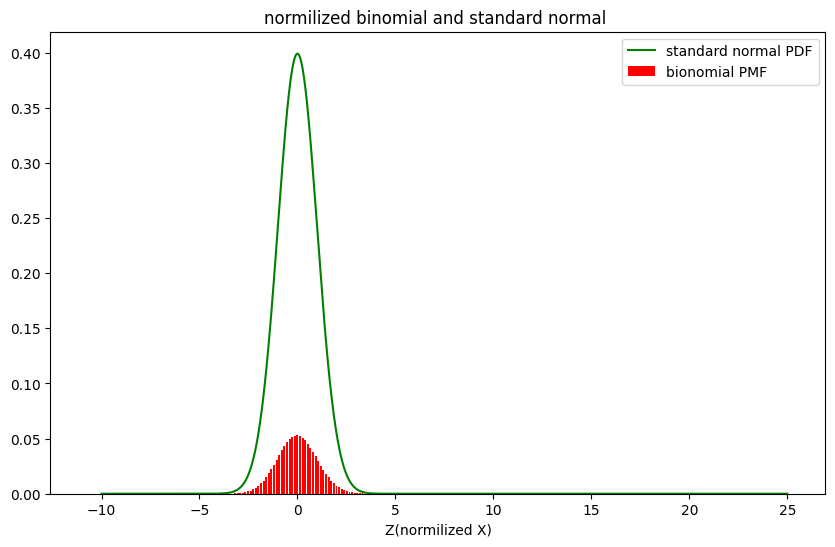

In [3]:
binom_mean = n * p
binom_var = n * p * (1 - p)
binom_std_dev = np.sqrt(binom_var)
#making distribution standard 

standard_k_values = (k_values - binom_mean) / np.sqrt((binom_var))
fig, ax = plt.subplots(figsize = (10, 6))


ax.bar(standard_k_values, binom_pmf, label = "bionomial PMF", color = "red", width = 0.1)

#new bounds for bionomial distrubtion possible values
begin = int((0 - 81) / binom_std_dev)
end = int((270 - 81) / binom_std_dev)

print(begin)
print(end)

intervals = np.linspace(begin, end, 1000)
normal_pdf = stats.norm.pdf(intervals, loc = 0, scale = 1)

ax.set_title("normilized binomial and standard normal ")
ax.plot(intervals, normal_pdf, color = 'green', label = 'standard normal PDF')
ax.set_xlabel("Z(normilized X)")
ax.legend()
#ax.set_xlim(-5, 5)
plt.show()


### Note:
After normilizing X as binomial distribution , possible values for normilized X is as follows:
$$X \sim \text{Bin}(n, p)$$
$$ 0 \leq X \leq 270 $$

after normilization

$$\frac{0 - np}{\sqrt{np(1-p)}} \leq \frac{X - np}{\sqrt{np(1 - p)}} \leq \frac{270 - np}{\sqrt{(np(1 - p))}}$$  
which is:
$$-10 \leq \Z \leq 25$$ 

we can see that binomial distribution for is looking a lot like normal distributino with some differences around the mean (as $X$ approaches bigger numbers, two graphs have pretty much the same value) that is expected too because bionomial with parameter $n$ is the sum of n bernoulli variables which are i.i.d and according to CLT , for large n , binomial distribution is expected to be approximated with a normal distribution with parameter : 
$(\mu = n^2p, \sigma^2 = np^2q^2)$


#### but what is happening around the mean that values of normilized bionomial and standard normal differs:  

around X = 0 (the standardized mean) the normal PDF value is higher than the corresponding binomial PMF value because we have the most discrepancy around the mean.(since binomial is a discrete distribution and normal is a continues one)




This discrepancy diminshes around the tails

### findnig the sum of every binomial bar's length:


In [4]:
bar_lengths_sum = 0
for pdf_value in binom_pmf:
    bar_lengths_sum += pdf_value

print(f"sum of length of every binomial bar is: {bar_lengths_sum}")

sum of length of every binomial bar is: 1.0000000000000009


As it is calculated above, the sum of length of all bars from binomial distribution is 1 which should be obvious too, because the hights of every bar is the value of binomial PMF at that specefic $X = X_0$ -- > $P(X = X_0)$

as said earlier, we were expecting to see normilized binomial PMF to converge to standard normal for $n = 270$ which is fairly a big number of i.i.d bernoulli RVs but the intersting part is that we are seeing that the area under the curve for standard normal 

#### Fixing the issue:
- The goal is to scale the normal distribution so that it can be compared with the binomial distribution.
- This involves multiplying the normal distribution by a coefficient that matches its total "area" to the binomial probabilities.



## Integral Approximation Using the Riemann Sum

The integral of a function \( f(x) \) over a range \([a, b]\) can be approximated using the Riemann sum:

$$
\int_a^b f(x) \, dx \approx \sum_{i=0}^N f(x_i) \, \Delta x
$$

Where:
- \( f(x) \): The probability density function (PDF) of the normal distribution.
- \( a, b \): The range of integration (e.g., bounds for the binomial distribution).
- \( N \): The number of intervals in the Riemann approximation.
- \( x_i \): Points within the intervals.
- \( \Delta x \): The width of each interval, calculated as:

$$
\Delta x = \frac{b - a}{N}
$$

The coefficient \( C \), representing the approximated area under the curve, is given by:

$$
C = \sum_{i=0}^N f(x_i) \, \Delta x
$$

This coefficient can be used to scale the normal distribution for comparison with the binomial distribution.




7.52994023880668


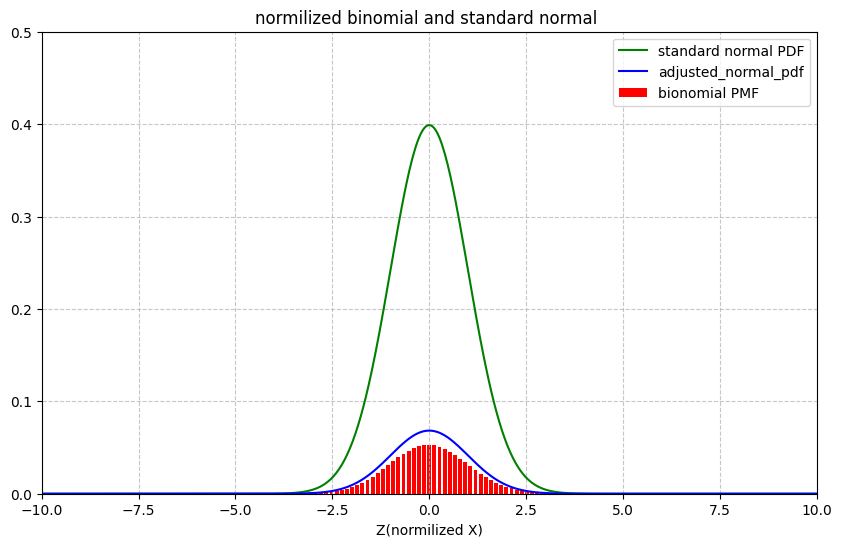

In [5]:
binom_std_dev = np.sqrt(binom_var)
print(binom_std_dev)
a = -3  #uppar bound of integral around the mean
b = 3 #lower bound of integral aournd the mean 
N = 1000  # number of intervals
delta_x = (b - a) / N
coefficient = np.sum(normal_pdf * delta_x)
adjusted_normal_pdf = normal_pdf * coefficient


ax.plot(intervals, adjusted_normal_pdf, color = 'blue', label = "adjusted_normal_pdf")
ax.grid(True, linestyle = '--', alpha = 0.7)
ax.set_xlim(-10, 10)
ax.set_ylim(0, 0.5)
#ax.set_xticks(np.arange(a, b + 1, 1))
ax.legend()
fig


### important note:
the graph above is shown intentionally from a limited range from $[-10, 10]$ just for the plots to look bigger and more percise which is a period chosen to be around the mean for normal distribution but it is worthy to remine again that the range that normilized binomial and standard normal distribution is as what shown before


as it is seen from the graph and changes from standard normal PDF and the adjusted one, the approximation around the mean has gotten much better and overall we can have a better normal approximation for the binomal distribution 

#### reporting coeffient value and standard deviation from section 1:


In [6]:
print(f"coefficient value is for normal approximation is: {coefficient}")
print(f"standard deviation for binomial distribution is: {binom_std_dev}")

coefficient value is for normal approximation is: 0.17125714285714289
standard deviation for binomial distribution is: 7.52994023880668


In [7]:
print(f"the value of inverse of std dev: {1 / binom_std_dev}")
print(f"the value of coefficient : {coefficient}")

the value of inverse of std dev: 0.13280317881493262
the value of coefficient : 0.17125714285714289


- the relation between coeffient value and standard deviation of binomial distribution can be seen as $C = \frac{1}{\sqrt{np(1 - p)}}$ scales with  
in in our epmirical results we can also see that finding the correction coeffient to get a better approximation for a binomial distribution comparing to a standard normal distribution is so close to the value of one over bionomial standard deviation 


calculating the exact probablity of 55 times heads out of 100 coin flips
$$X \sim \text{Bin}(n, p)$$
$$ P_X(k) = \binom{n}{k} p ^ k (1 - p) ^ (n - k) $$
calculating with normal approximation:  
$$P(X = K) \simeq  \frac{1}{\sqrt{np(1 - p)}} \phi(\frac{(K - np)}{\sqrt{np(1 - p)}})$$

let $\phi$ be the standard normal distribtion

In [8]:
n = 100 
k = 55
p = 0.5

binom_std_dev = np.sqrt(n * p * (1 - p))
binom_mean = n * p 
exact_heads_prob = stats.binom.pmf(k, n, p)

#calculating normal appoximation
correction_coefficient  = 1 / binom_std_dev
normal_k = (k - binom_mean) / binom_std_dev
approx_normal_pdf = stats.norm.pdf(normal_k, loc = 0, scale = 1)
approx_heads_prob = correction_coefficient * approx_normal_pdf


print(f"exact binomial probabilty = {exact_heads_prob}\napproximated probablity using normal approximation = {approx_heads_prob}" )
print(f"Error margin: {np.abs(exact_heads_prob - approx_heads_prob):.6f}")

exact binomial probabilty = 0.04847429662643072
approximated probablity using normal approximation = 0.04839414490382868
Error margin: 0.000080


finding the probablity of heads to be between 40 to 60 using normal approximation:
$$np = 50, np(1 - p) = 25$$
$$P(40 \leq X \leq 60) \simeq P(\frac{40 - 50}{5} \leq \frac{X - 50}{5} \leq \frac{60 - 50}{5}) = P(-2 \leq Z \leq 2)$$
$$\phi(11) - \phi(3)$$
Let $\phi$ be the standard normal CDF

In [9]:
lower_bound = -2
upper_bound = 2

cdf_lower_bound = stats.norm.cdf(3, loc = 0, scale = 1)
cdf_higher_bound = stats.norm.cdf(upper_bound, loc = 0, scale = 1)
print(f"the probablity for number of heads te be between 40 to 60: {cdf_lower_bound}")

the probablity for number of heads te be between 40 to 60: 0.9986501019683699
